Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.73      0.78        98

    accuracy                           1.00     56962
   macro avg       0.92      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56850    14]
 [   26    72]]
Accuracy: 0.9992977774656788


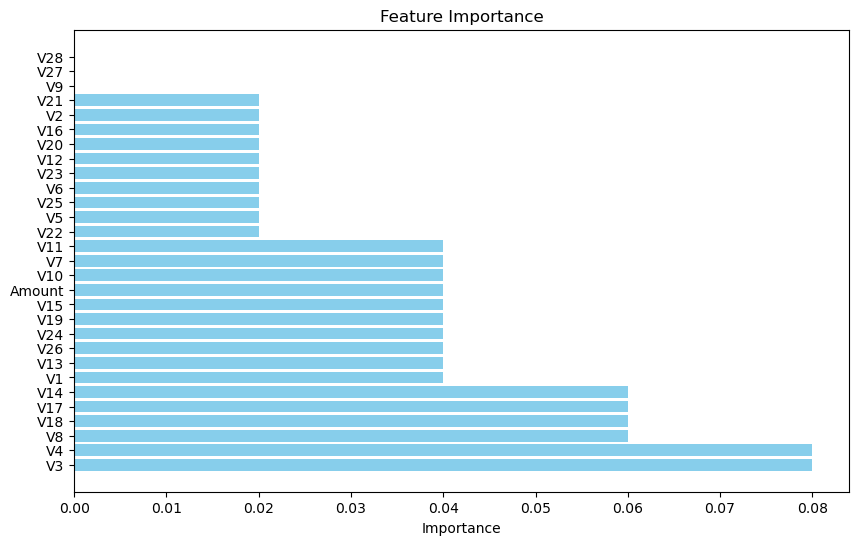

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import ConfusionMatrixDisplay

# Loading the dataset
data = pd.read_csv("creditcard.csv")

# Feature matrix (X) and target variable (y)
X = data.drop(['Time', 'Class'], axis=1)
y = data['Class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the AdaBoost model
model = AdaBoostClassifier(n_estimators=50, random_state=42)

model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Feature Importance 
if hasattr(model, 'feature_importances_'):
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.show()


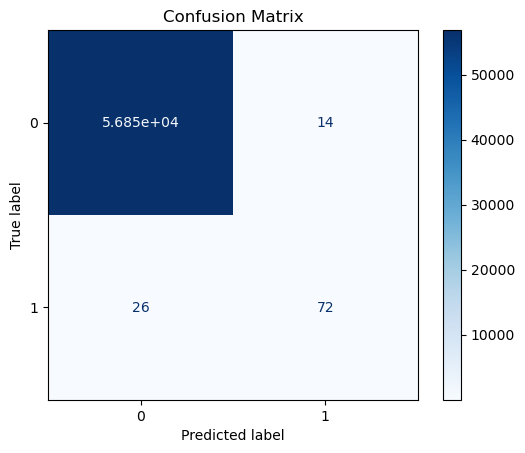

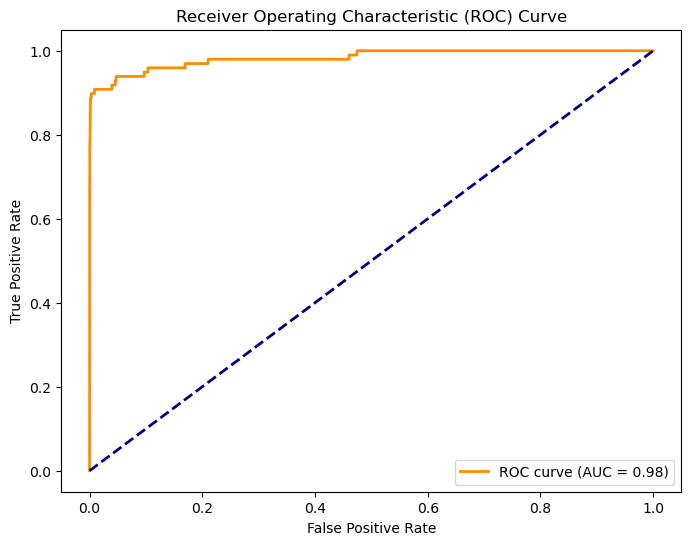

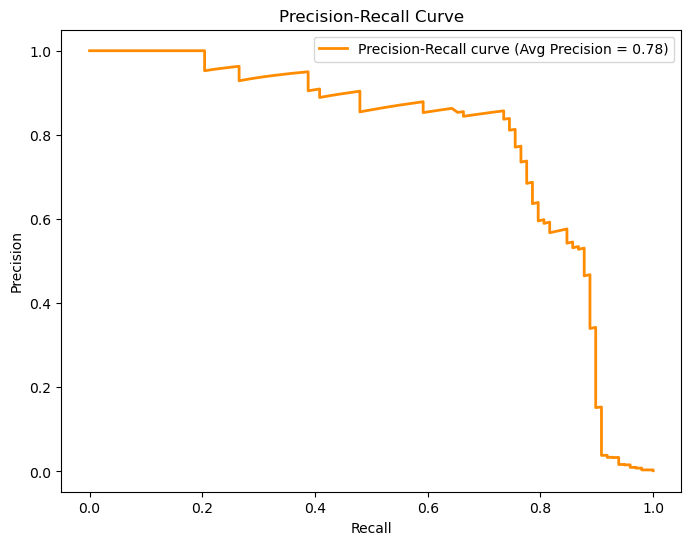

In [4]:
# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".4g")
plt.title('Confusion Matrix')
plt.show()

# Plotting ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plotting Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (Avg Precision = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

<b>Interpretation and Comparison: </b>

Classification Report: The classification report provides metrics such as precision, recall, and F1-score for both classes (fraud and non-fraud). It gives a comprehensive view of the model's performance on different aspects.

Feature Importance: AdaBoost provides a measure of feature importance, helping to identify which features contribute most to the model's decisions.

Confusion Matrix: The confusion matrix provides a detailed breakdown of the model's predictions, showing true positives, true negatives, false positives, and false negatives. It's a valuable tool to understand the model's ability to correctly classify instances.

Accuracy: Accuracy is a general measure of the model's overall correctness. However, in imbalanced datasets like credit card fraud detection, accuracy alone might be misleading, and other metrics like precision and recall are crucial.

ROC Curve and AUC: The ROC curve illustrates the trade-off between true positive rate and false positive rate at various thresholds. The Area Under the Curve (AUC) quantifies the overall performance of the model. A higher AUC indicates better discrimination.

Precision-Recall Curve and Average Precision: Precision-Recall curves are particularly relevant for imbalanced datasets. Average Precision provides a summary measure of the model's ability to correctly identify positive instances.